# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

I am interested in this web scrapping capstone project because it provides an opportunity to gather valuable data from website. By scrapping data from the web, I can extract and analyze information directly from various sources. In this project I will analyze the USD-IDR exchange rate trends over a specific period by scrapping data from the website https://www.exchange-rates.org/exchange-rate-history/usd-idr' to gain insight into USD-IDR exchange rate trends during the Year 2024 of USD to IDR rate historical data from Januari 01, 2024 to September 06, 2024. I aim to identify the highest and lowest USD-IDR exchange rates, analyze the statistical data and make the conclusion.

[Case Data kurs US Dollar ke rupiah](https://www.exchange-rates.org/exchange-rate-history/usd-idr), especially
(https://www.exchange-rates.org/exchange-rate-history/usd-idr-2024)

   - Based on the website, find `tanggal`, dan `harga harian`
   - Create the plot of USD-IDR exchange rate over a certain periode.

Step-by-Step Plan:
1. Send an HTTP Request: Use the requests library to fetch the webpage.
2. Parse the HTML: Use BeautifulSoup to parse the HTML content and locate the relevant data.
3. Extract the Data: Identify the table or tags that contain the inflation data and extract it into a structured format.
4. Create a DataFrame: Convert the extracted data into a pandas DataFrame.
5. Data Wrangling: Clean and prepare the data for visualization.
6. Visualize the Data: Use matplotlib to plot the data.
7. Analyze the Data and make a conclusion.


## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [218]:
#1. Import required data and send a GET request to the webpage.
#2. Check if the request is successful. If the response status code = 200, means the request is success.
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr-2024')
url_get

<Response [200]>

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [219]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR Exchange Rate History for 2024</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base h'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [220]:
#3. Creating a BeautifulSoup
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

*(To extract the desired information from a webpage, we need to understand the underlying HTML structure. The .find() method in BeautifulSoup is used to search a specific HTML elements /tags that contain the data we want, but to make it effective, we need to know the exact tags/ classes/ IDs associated with that data. The .prettify () method in BeautifulSoup helps us format the raw HTML content in a more readable and indented way for easier navigation, efficient data extraction, etc. By combining .prettify() with .find(), we can efficeintly locate and extract the necessary information from any webpage)* 


In [221]:

    # Find the table containing exchange rate data
table = soup.find('table', {'class': 'history-rates-data'})
    
if table:
        # Find all rows in the table
        rows = table.find_all('tr', {'class': ''})  # Rows with class='' contain the data

        # List to store extracted data
        exchange_rates = []

        # Loop through each row and extract data using a temporary variable
        for row in rows:
            # Temporary dictionary to hold the data for this row
            temp = {}

            # Extract the date and exchange rate if available
            date_element = row.find('a', class_='n')
            rate_element = row.find('span', class_='n')

            if date_element and rate_element:
                # Store data in the temporary variable
                temp['Date'] = date_element.text.strip()
                temp['Exchange Rate'] = rate_element.text.strip().replace('1 USD =', '').strip()

                # Append the temp dictionary to the final list
                exchange_rates.append(temp)

        # Print the extracted exchange rates
        for rate_info in exchange_rates:
            print(rate_info)

{'Date': '2024-1-1', 'Exchange Rate': '15,390 IDR'}
{'Date': '2024-1-3', 'Exchange Rate': '15,562 IDR'}
{'Date': '2024-1-5', 'Exchange Rate': '15,503 IDR'}
{'Date': '2024-1-9', 'Exchange Rate': '15,536 IDR'}
{'Date': '2024-1-11', 'Exchange Rate': '15,563 IDR'}
{'Date': '2024-1-15', 'Exchange Rate': '15,553 IDR'}
{'Date': '2024-1-17', 'Exchange Rate': '15,638 IDR'}
{'Date': '2024-1-19', 'Exchange Rate': '15,620 IDR'}
{'Date': '2024-1-23', 'Exchange Rate': '15,726 IDR'}
{'Date': '2024-1-25', 'Exchange Rate': '15,820 IDR'}
{'Date': '2024-1-29', 'Exchange Rate': '15,835 IDR'}
{'Date': '2024-1-31', 'Exchange Rate': '15,768 IDR'}
{'Date': '2024-2-1', 'Exchange Rate': '15,733 IDR'}
{'Date': '2024-2-5', 'Exchange Rate': '15,775 IDR'}
{'Date': '2024-2-7', 'Exchange Rate': '15,653 IDR'}
{'Date': '2024-2-9', 'Exchange Rate': '15,611 IDR'}
{'Date': '2024-2-13', 'Exchange Rate': '15,671 IDR'}
{'Date': '2024-2-15', 'Exchange Rate': '15,679 IDR'}
{'Date': '2024-2-19', 'Exchange Rate': '15,643 IDR'}
{

Do the scrapping process here (please change this markdown with your explanation). 

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [222]:

    # Find the table containing exchange rate data
table = soup.find('table', {'class': 'history-rates-data'})
    
if table:
        # Find all rows in the table
        rows = table.find_all('tr', {'class': ''})  # Rows with class='' contain the data

        # List to store extracted data
        exchange_rates = []

        # Loop through each row and extract data using a temporary variable
        for row in rows:
            # Temporary dictionary to hold the data for this row
            temp = {}

            # Extract the date and exchange rate if available
            date_element = row.find('a', class_='n')
            rate_element = row.find('span', class_='n')

            if date_element and rate_element:
                # Store data in the temporary variable
                temp['Date'] = date_element.text.strip()
                temp['Exchange Rate'] = rate_element.text.strip().replace('1 USD =', '').strip()

                # Append the temp dictionary to the final list
                exchange_rates.append(temp)

        # Print the extracted exchange rates
        for rate_info in exchange_rates:
            print(rate_info)

{'Date': '2024-1-1', 'Exchange Rate': '15,390 IDR'}
{'Date': '2024-1-3', 'Exchange Rate': '15,562 IDR'}
{'Date': '2024-1-5', 'Exchange Rate': '15,503 IDR'}
{'Date': '2024-1-9', 'Exchange Rate': '15,536 IDR'}
{'Date': '2024-1-11', 'Exchange Rate': '15,563 IDR'}
{'Date': '2024-1-15', 'Exchange Rate': '15,553 IDR'}
{'Date': '2024-1-17', 'Exchange Rate': '15,638 IDR'}
{'Date': '2024-1-19', 'Exchange Rate': '15,620 IDR'}
{'Date': '2024-1-23', 'Exchange Rate': '15,726 IDR'}
{'Date': '2024-1-25', 'Exchange Rate': '15,820 IDR'}
{'Date': '2024-1-29', 'Exchange Rate': '15,835 IDR'}
{'Date': '2024-1-31', 'Exchange Rate': '15,768 IDR'}
{'Date': '2024-2-1', 'Exchange Rate': '15,733 IDR'}
{'Date': '2024-2-5', 'Exchange Rate': '15,775 IDR'}
{'Date': '2024-2-7', 'Exchange Rate': '15,653 IDR'}
{'Date': '2024-2-9', 'Exchange Rate': '15,611 IDR'}
{'Date': '2024-2-13', 'Exchange Rate': '15,671 IDR'}
{'Date': '2024-2-15', 'Exchange Rate': '15,679 IDR'}
{'Date': '2024-2-19', 'Exchange Rate': '15,643 IDR'}
{

In [258]:
rows = table.find_all('tr', {'class': ''}) 
row_length = len(rows)
row_length

103

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

In [259]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the page to scrape
url = 'https://www.exchange-rates.org/exchange-rate-history/usd-idr-2024'

# Make a request to the website
response = requests.get(url)
if response.status_code == 200:
    # Parse the page content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table containing exchange rate data
    table = soup.find('table', {'class': 'history-rates-data'})
    
    if table:
        # Find all rows in the table
        rows = table.find_all('tr', {'class': ''})  # Rows with class='' contain the data

        # List to store extracted data
        exchange_rates = []

        # Loop through each row and extract data using a temporary variable
        for row in rows:
            # Temporary dictionary to hold the data for this row
            temp = {}

            # Extract the date and exchange rate if available
            date_element = row.find('a', class_='n')
            rate_element = row.find('span', class_='n')

            if date_element and rate_element:
                # Store data in the temporary variable
                temp['Date'] = date_element.text.strip()
                temp['Exchange Rate'] = rate_element.text.strip().replace('1 USD =', '').replace(',', '').strip()

                # Append the temp dictionary to the final list
                exchange_rates.append(temp)

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [225]:
# Create a DataFrame from the extracted data
df = pd.DataFrame(exchange_rates)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Basic data wrangling
# Sort by Date
df = df.sort_values(by='Date')

# Reset index after sorting
df.reset_index(drop=True, inplace=True)

# Display the first few rows of the DataFrame
print(df.head(12))

         Date Exchange Rate
0  2024-01-01     15390 IDR
1  2024-01-03     15562 IDR
2  2024-01-05     15503 IDR
3  2024-01-09     15536 IDR
4  2024-01-11     15563 IDR
5  2024-01-15     15553 IDR
6  2024-01-17     15638 IDR
7  2024-01-19     15620 IDR
8  2024-01-23     15726 IDR
9  2024-01-25     15820 IDR
10 2024-01-29     15835 IDR
11 2024-01-31     15768 IDR


In [226]:
print(df.tail(12))

         Date Exchange Rate
82 2024-08-09     15950 IDR
83 2024-08-13     15756 IDR
84 2024-08-15     15773 IDR
85 2024-08-19     15530 IDR
86 2024-08-21     15508 IDR
87 2024-08-23     15401 IDR
88 2024-08-27     15481 IDR
89 2024-08-29     15466 IDR
90 2024-09-02     15554 IDR
91 2024-09-04     15458 IDR
92 2024-09-06     15458 IDR
93 2024-09-10     15494 IDR


### Data Cleansing
Data cleaning is a crucial phase in data analysis and data science that focuses on preparing and correcting data to enhance its quality and accuracy. One key aspect of data cleaning involves ensuring that each column in the dataset is assigned the correct data type. For instance, using the .dtypes attribute in Pandas helps to identify and verify the data types of columns such as Date and Exchange Rate. This step allows for converting columns to appropriate data types, such as converting the Date column to a datetime type and the Exchange Rate column to a float type, which is essential for accurate data analysis and processing.

In [227]:
df.dtypes

Date             datetime64[ns]
Exchange Rate            object
dtype: object

In [228]:
# Remove "IDR" and any extra spaces, then convert 'Exchange Rate' to Float64
df['Exchange Rate'] = df['Exchange Rate'].str.replace('IDR', '').str.strip()

In [230]:
df.dtypes

Date             datetime64[ns]
Exchange Rate           float64
dtype: object

In [231]:
# Ekstrak bulan dari tanggal untuk menghitung rata-rata bulanan
df['Month'] = df['Date'].dt.to_period('M')

# Hitung rata-rata bulanan
monthly_avg = df.groupby('Month')['Exchange Rate'].mean().reset_index()

# Konversi 'Month' kembali ke format datetime untuk plotting
monthly_avg['Month'] = monthly_avg['Month'].dt.to_timestamp()

# Tampilkan beberapa baris pertama dari DataFrame rata-rata bulanan
print(monthly_avg)

       Month  Exchange Rate
0 2024-01-01   15626.166667
1 2024-02-01   15672.909091
2 2024-03-01   15712.636364
3 2024-04-01   16073.181818
4 2024-05-01   16078.166667
5 2024-06-01   16351.000000
6 2024-07-01   16251.250000
7 2024-08-01   15762.909091
8 2024-09-01   15491.000000


In [232]:
df.dtypes

Date             datetime64[ns]
Exchange Rate           float64
Month                 period[M]
dtype: object

In [233]:
df.head(12)

,Date,Exchange Rate,Month
0,2024-01-01,15390.0,2024-01
1,2024-01-03,15562.0,2024-01
2,2024-01-05,15503.0,2024-01
3,2024-01-09,15536.0,2024-01
4,2024-01-11,15563.0,2024-01
5,2024-01-15,15553.0,2024-01
6,2024-01-17,15638.0,2024-01
7,2024-01-19,15620.0,2024-01
8,2024-01-23,15726.0,2024-01
9,2024-01-25,15820.0,2024-01


In [234]:
df.tail(12)

,Date,Exchange Rate,Month
82,2024-08-09,15950.0,2024-08
83,2024-08-13,15756.0,2024-08
84,2024-08-15,15773.0,2024-08
85,2024-08-19,15530.0,2024-08
86,2024-08-21,15508.0,2024-08
87,2024-08-23,15401.0,2024-08
88,2024-08-27,15481.0,2024-08
89,2024-08-29,15466.0,2024-08
90,2024-09-02,15554.0,2024-09
91,2024-09-04,15458.0,2024-09


### Data Visualization

(please change this markdown with your explanation of what you do for data wrangling)

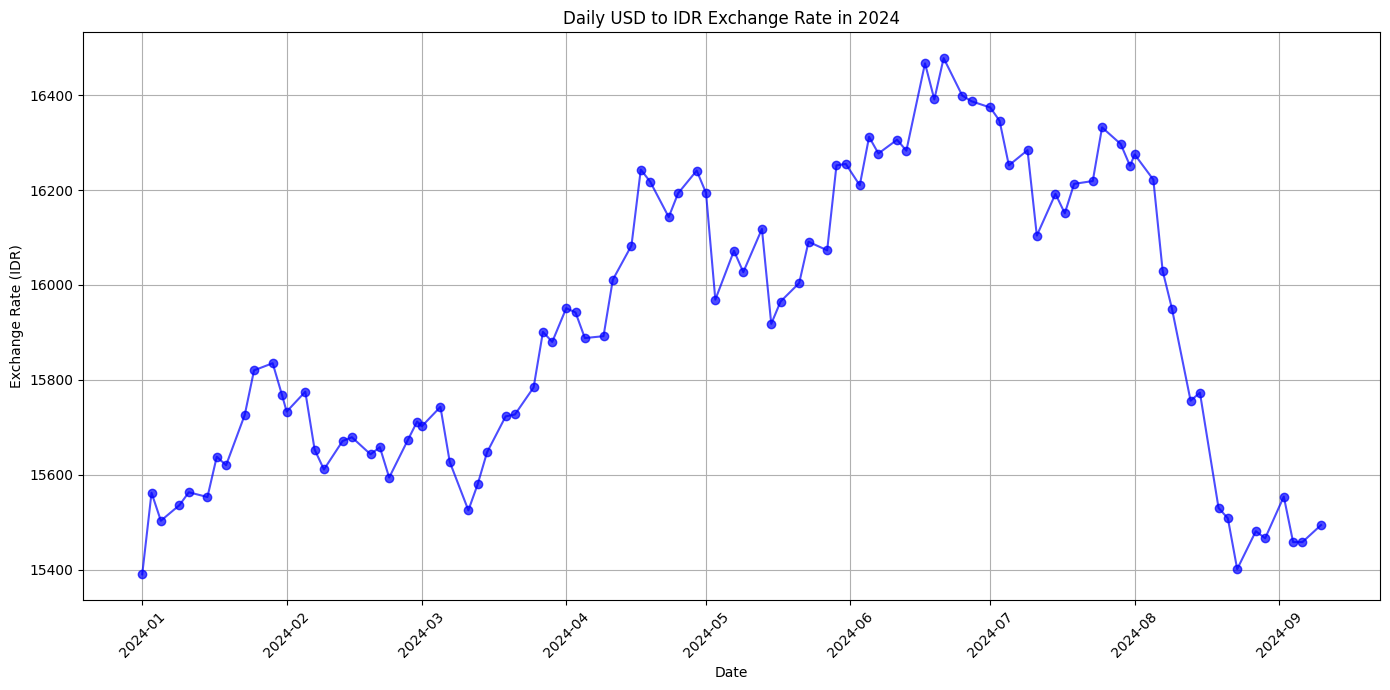

In [235]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Exchange Rate'], marker='o', linestyle='-', color='b', alpha=0.7)
plt.title('Daily USD to IDR Exchange Rate in 2024')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (IDR)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

In [236]:
# Filter data for January 2024
df_january = df[df['Date'].dt.month == 1]
df_january = df_january[df_january['Date'].dt.year == 2024]

# Get descriptive statistics for January 2024
stats_january = df_january['Exchange Rate'].describe()

# Print descriptive statistics
print("Descriptive Statistics for January 2024:")
print(stats_january)

Descriptive Statistics for January 2024:
count       12.000000
mean     15626.166667
std        136.174910
min      15390.000000
25%      15548.750000
50%      15591.500000
75%      15736.500000
max      15835.000000
Name: Exchange Rate, dtype: float64


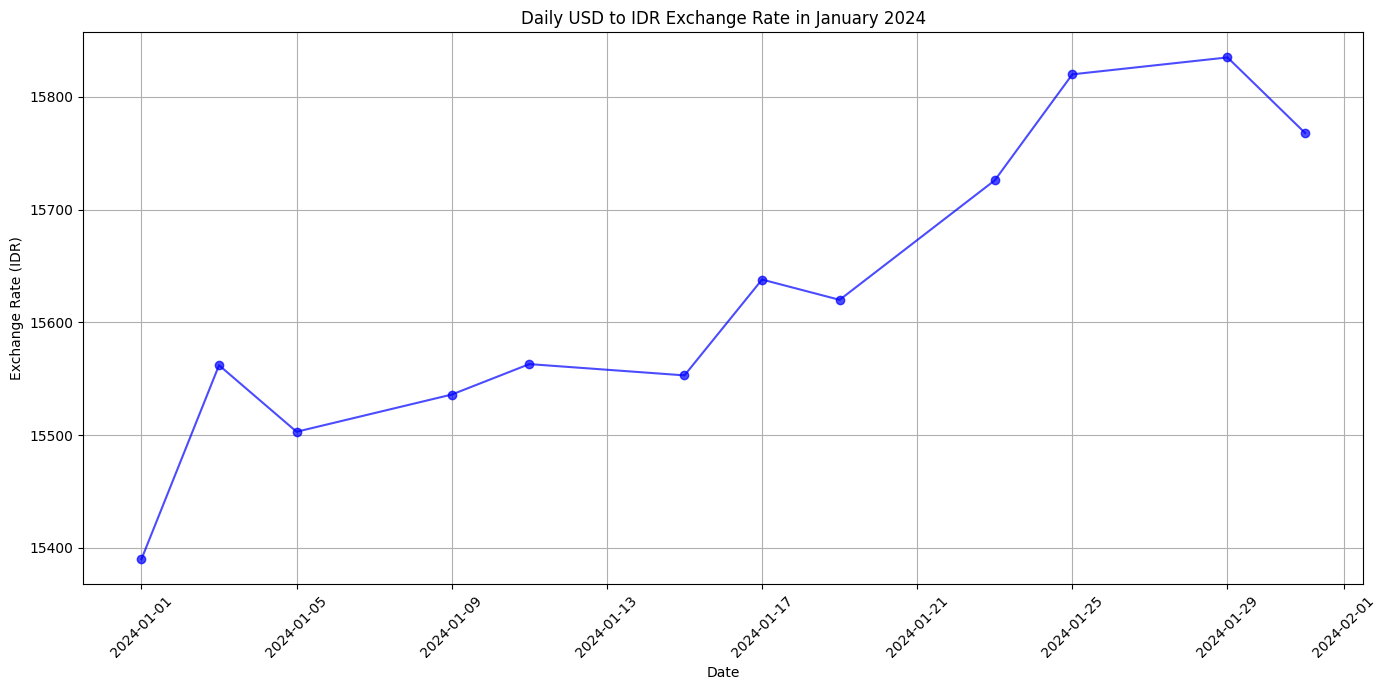

In [237]:
# Plot daily exchange rates for January 2024
plt.figure(figsize=(14, 7))
plt.plot(df_january['Date'], df_january['Exchange Rate'], marker='o', linestyle='-', color='b', alpha=0.7)
plt.title('Daily USD to IDR Exchange Rate in January 2024')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (IDR)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [238]:
# Filter data for May 2024
df_may = df[(df['Date'].dt.month == 5) & (df['Date'].dt.year == 2024)]

# Get descriptive statistics for May 2024
stats_may = df_may['Exchange Rate'].describe()

# Print descriptive statistics
print("Descriptive Statistics for May 2024:")
print(stats_may)

Descriptive Statistics for May 2024:
count       12.000000
mean     16078.166667
std        110.871616
min      15918.000000
25%      15995.250000
50%      16072.500000
75%      16137.000000
max      16255.000000
Name: Exchange Rate, dtype: float64


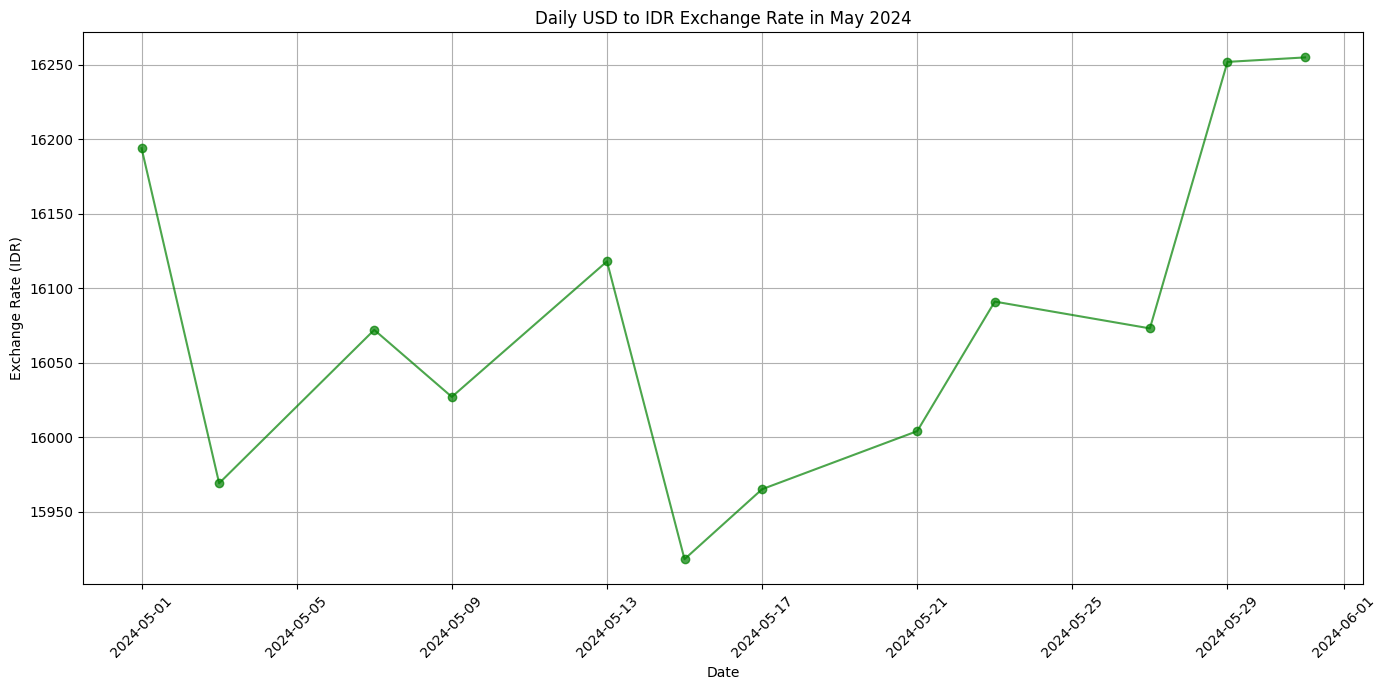

In [239]:
# Plot daily exchange rates for May 2024
plt.figure(figsize=(14, 7))
plt.plot(df_may['Date'], df_may['Exchange Rate'], marker='o', linestyle='-', color='g', alpha=0.7)
plt.title('Daily USD to IDR Exchange Rate in May 2024')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (IDR)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Descriptive Statistics for June 2024:
count       10.000000
mean     16351.000000
std         87.121881
min      16210.000000
25%      16288.750000
50%      16349.500000
75%      16397.000000
max      16478.000000
Name: Exchange Rate, dtype: float64


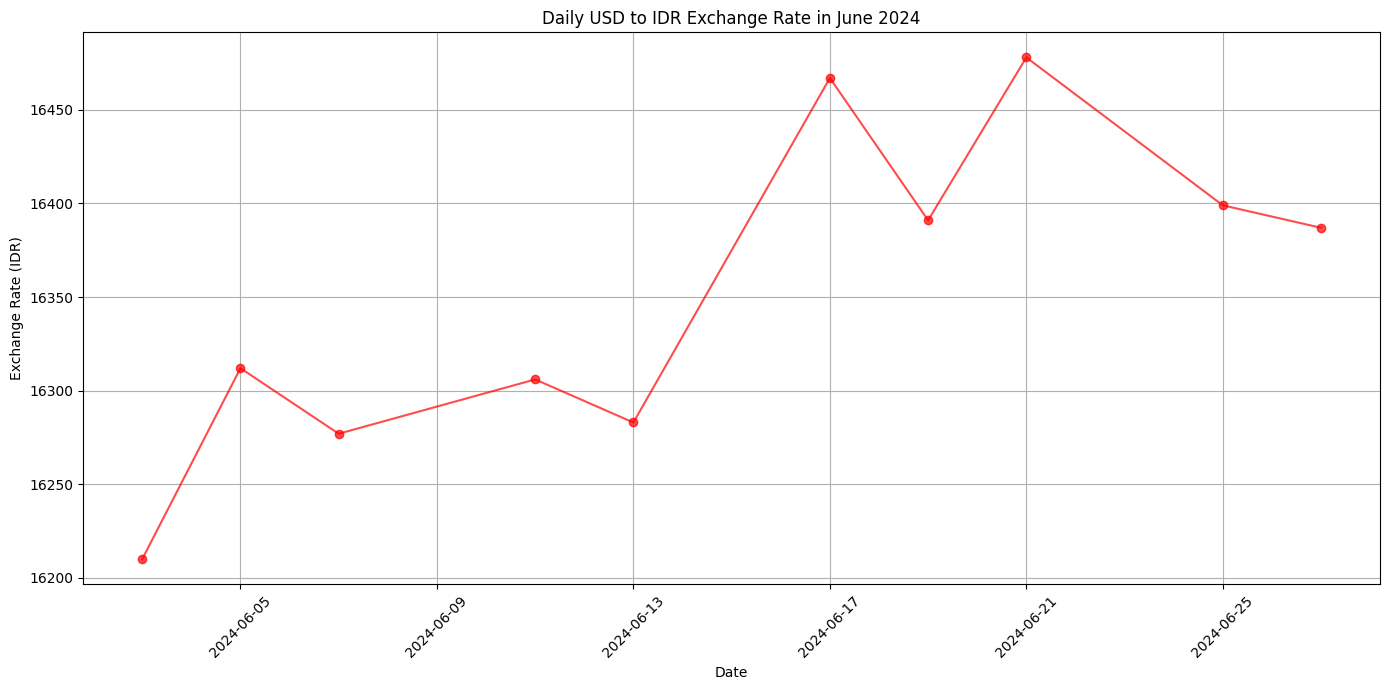

In [240]:
# Filter data for June 2024
df_june = df[(df['Date'].dt.month == 6) & (df['Date'].dt.year == 2024)]

# Get descriptive statistics for June 2024
stats_june = df_june['Exchange Rate'].describe()

# Print descriptive statistics
print("Descriptive Statistics for June 2024:")
print(stats_june)

# Plot daily exchange rates for June 2024
plt.figure(figsize=(14, 7))
plt.plot(df_june['Date'], df_june['Exchange Rate'], marker='o', linestyle='-', color='r', alpha=0.7)
plt.title('Daily USD to IDR Exchange Rate in June 2024')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (IDR)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [249]:
# Filter data untuk bulan September 2024
df_september_2024 = df[(df['Date'].dt.year == 2024) & (df['Date'].dt.month == 9)]

# Hitung statistik deskriptif
descriptive_stats = df_september_2024['Exchange Rate'].describe()

print("Statistik Deskriptif untuk September 2024:")
print(descriptive_stats)

Statistik Deskriptif untuk September 2024:
count        4.000000
mean     15491.000000
std         45.299007
min      15458.000000
25%      15458.000000
50%      15476.000000
75%      15509.000000
max      15554.000000
Name: Exchange Rate, dtype: float64


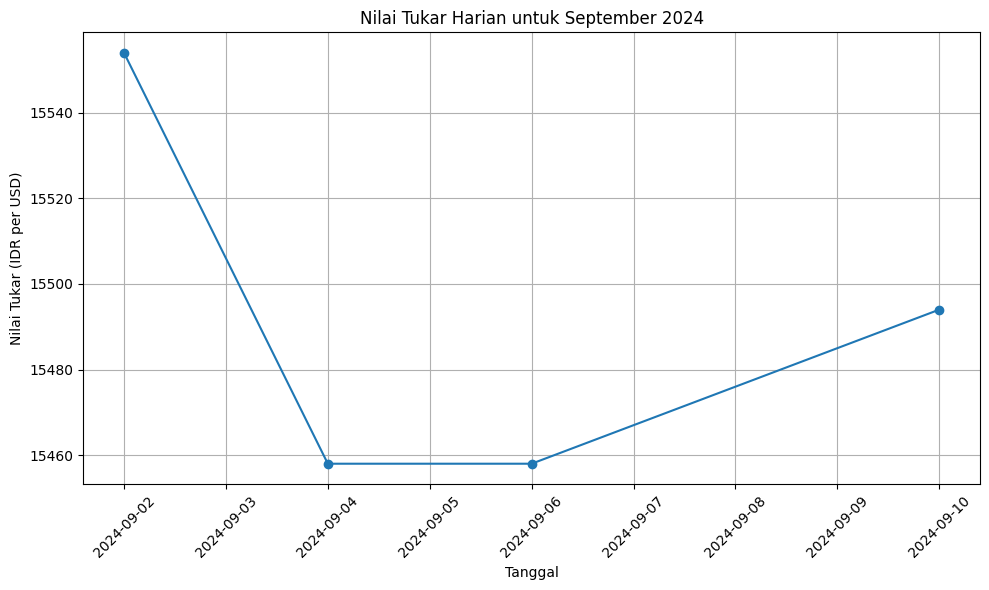

In [250]:
# Plot nilai tukar harian
plt.figure(figsize=(10, 6))
plt.plot(df_september_2024['Date'], df_september_2024['Exchange Rate'], marker='o', linestyle='-')
plt.title('Nilai Tukar Harian untuk September 2024')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Tukar (IDR per USD)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotasi tanggal agar lebih mudah dibaca
plt.tight_layout()  # Untuk menghindari overlap label
plt.show()

In [255]:
df_september_2024.head(12)

,Date,Exchange Rate,Month
90,2024-09-02,15554.0,2024-09
91,2024-09-04,15458.0,2024-09
92,2024-09-06,15458.0,2024-09
93,2024-09-10,15494.0,2024-09


In [241]:
# Analysis for the entire year 2024
stats_year = df['Exchange Rate'].describe()

# Filter data for January, May, and June 2024
df_january = df[(df['Date'].dt.month == 1) & (df['Date'].dt.year == 2024)]
df_may = df[(df['Date'].dt.month == 5) & (df['Date'].dt.year == 2024)]
df_june = df[(df['Date'].dt.month == 6) & (df['Date'].dt.year == 2024)]

# Get descriptive statistics for January, May, and June 2024
stats_january = df_january['Exchange Rate'].describe()
stats_may = df_may['Exchange Rate'].describe()
stats_june = df_june['Exchange Rate'].describe()

# Print descriptive statistics for the entire year
print("Descriptive Statistics for 2024:")
print(stats_year)


Descriptive Statistics for 2024:
count       94.000000
mean     15918.925532
std        307.001357
min      15390.000000
25%      15648.500000
50%      15909.500000
75%      16216.750000
max      16478.000000
Name: Exchange Rate, dtype: float64


In [247]:
# Temukan baris dengan nilai tukar minimum
min_row = df.loc[df['Exchange Rate'].idxmin()]

# Temukan baris dengan nilai tukar maksimum
max_row = df.loc[df['Exchange Rate'].idxmax()]

# Temukan baris dengan nilai tukar median
median_row = df.loc[(df['Exchange Rate'].sort_values().index[df.shape[0] // 2])]

print(f"Tanggal dengan nilai tukar minimum: {min_row['Date']} dengan nilai tukar {min_row['Exchange Rate']}")
print(f"Tanggal dengan nilai tukar maksimum: {max_row['Date']} dengan nilai tukar {max_row['Exchange Rate']}")
print(f"Tanggal dengan nilai tukar median: {median_row['Date']} dengan nilai tukar {median_row['Exchange Rate']}")

Tanggal dengan nilai tukar minimum: 2024-01-01 00:00:00 dengan nilai tukar 15390.0
Tanggal dengan nilai tukar maksimum: 2024-06-21 00:00:00 dengan nilai tukar 16478.0
Tanggal dengan nilai tukar median: 2024-05-15 00:00:00 dengan nilai tukar 15918.0


In [248]:
# Pastikan kolom 'Date' diubah menjadi tipe datetime untuk mempermudah pemfilteran
df['Date'] = pd.to_datetime(df['Date'])

# Filter data untuk tahun 2024
df_2024 = df[df['Date'].dt.year == 2024]

# Hitung rata-rata nilai tukar untuk tahun 2024
mean_exchange_rate_2024 = df_2024['Exchange Rate'].mean()

print(f"Rata-rata nilai tukar untuk tahun 2024: {mean_exchange_rate_2024}")

Rata-rata nilai tukar untuk tahun 2024: 15918.925531914894


## Analysis

(Put your analysis and conclusion here.)

![alt text](image.png)

**Analysis & Conclusion:**

**Yearly & Monthly Trends:**
The exchange rate data for 2024 (from Jan 01-2024 to Sep 10-2024) provides a comprehensive view of the fluctuations throughout the year as shown on the above plot chart.

Opening the Year 2024 (01 Jan 2024), the exchange rate was at the minimum point (Rp. 15390/USD) and by month of September 2024, the exchange rate was almost reach back to the minimum point amounting to Rp. 15491/USD averagely. There was different in exchange rate of Rp. 101/USD. The average rates on September are close to the minimum rate as on 01 Jan 2024, indicating a significant drop (start declining from around August 2024).

The exchange rate reached the maximum point in 21 June 2024 amounting to Rp. 16478/USD and by analyzing June's statistics, we can see there were extremes instability compared to other months. 

**General Observations:**

Minimum Exchange Rate: 15390.0 on 2024-01-01T00:00:00.000000000

Maximum Exchange Rate: 16478.0 on 2024-06-21T00:00:00.000000000

Median Exchange Rate: 15918.0 on 2024-05-15T00:00:00.000000000

The mean values (Rp. 15918/USD) across the months over the periode of 2024 will indicate the average strength of the IDR against the USD in those months.

The median (Rp. 15909/USD) provides insight into the central tendency of the exchange rates, while the minimum and maximum give the range of rates experienced.

The standard deviation (Rp. 307/USD) reflects how much the exchange rates varied from the average, providing insights into volatility. This means that the exchange rates typically vary by ± Rp.307/USD from the average value of Rp. 15918/USD. Therefore, most exchange rates will fall between Rp. 15611/USD and Rp. 16225/USD, assuming a normal distribution.


### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.